# Basic text classification

## 참고 : https://www.tensorflow.org/tutorials/keras/text_classification

### [2022년 6월10일 ~ 6월17일]

# 영화 리뷰를 사용한 텍스트 분류

해당 예시에서는 영화 리뷰(후기) 텍스트를 가져와서 이 후기는  "긍정" (positive) 또는 "부정" (negative)로 분류 해볼꺼에요.

이 예제는 이진(binary, 두개로 분류) 즉 예측을 둘중 하나의 값으로 분류하는 문제입니다.  예) 긍정 / 부정, 사람이다 / 아니다, 등등 두개의 값으로 많이 사용되는 분류방법입니다.

해당 예시에서는 tf.keras 모듈을 사용해서 해볼려고 합니다!

그러기 위해서 일단 필요한 모듈을 설치 및 불러와 봐요~


## 필요 모듈 설치 및 불러오기

### 해당 예시에서는 tensorflow  2.8.0 버전을 사용할것입니다.

#### 아래 불러오기 함수가 실행이 안되면 아래 pip 코드 실행하기


In [1]:
# !pip install tensorflow=="2.8.2" 


In [2]:
# 필요 모듈 불러오기
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.__version__)
import os


2.8.2


## IMDB 데이터셋 다운로드

IMDB 데이터셋은 텐서플로우에서 쉽게 불러와 사용할 수 있도록 미리 전처리 된 형태에서 제공하고 있어요.

어떤 전처리를 해두었을까요?

- string에서 숫자로 변환
    - 우리가 보통 생각하기에 리뷰 데이터는 "와 이 영화 진짜 개꿀잼" 이런식으로 string 형식이겠죠. 하지만, 우리가 사용할 모델은 이런 string 형식이 input으로 들어오면 이해하지 못해요, 왜냐하면 모델은 "숫자"를 받아 프로세스 하기 때문이죠!

- 숫자로 변환? 근데 어떻게??
    - 주어진 string 형식의 정보를 변환해 모델에 넣어주는 방식은 여러가지가 있어요! 해당 예시에서 우리가 변환하는 방식은 간단해요!
        - 특정 단어가 유일한 숫자값으로 mapping 되어있는 어휘사전으로 각 string을 숫자로 변화했어요!
        - 조금 더 풀어서 얘기하면.. 일단 이번에 분석하고자하는 모든 데이터에 존재하는 모든 unique 단어를 찾아서 각각 다른 숫자를 지정해서 dictionary로 만들어주면 되요!
             
             {'I': 100,  'tsukino': 52006,  'nunnery': 52007,  'love': 16816, 'vani': 63951, 'woods': 1408, 'spiders': 16115, ... }
 
        - 위와 같은 dictionary가 만들어지고, "I love spiders" 를 string -> 숫자로 변환한다면   100,16816,16115    이런식으로 바꿔서 데이터를 사용할 수 있겠죠?

#### 아래에서 keras.datasets.imdb 데이터를 불러와봅시다!

In [3]:
imdb = keras.datasets.imdb   # keras에 있는 많은 datasets 예시에서 imdb 데이터 셋 object 불러오기

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)     
# load_data 함수 사용해서 imdb 데이터의 train / test   데이터와 레이블 각각 불러오기     
# num_words = 10000 을 설정하면 전체 데이터넷에서 많이 나타난 unique 한 단어 상위 10000개를 가져와요. 만약 100이라 하면 unique 100개만 가져오겠죠?

In [4]:
# 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [5]:
# num_words 100 하면,   0~99로 각 단어를 변환한다. 즉 max는 99. (그렇다고 각 문서의 가장 큰 값이 99는 아니다. 해당 단어가 해당 리뷰에 없으면 더 작은값이 나옴)

(train_data_100, train_labels_100), (test_data_100, test_labels_100) = imdb.load_data(num_words=100)     


In [6]:
print("< num_words = 100 설정했을때 >")
print("각 문서에서 가장 큰 값")
print(max(train_data_100))
print()
print("모든 문서에서 가장 큰 값")
print(max(max(train_data_100)))

< num_words = 100 설정했을때 >
각 문서에서 가장 큰 값
[1, 99, 78, 13, 66, 40, 2, 2, 5, 2, 2, 21, 4, 2, 2, 8, 2, 14, 2, 2, 6, 2, 7, 2, 6, 2, 7, 2, 21, 12, 32, 2, 2, 2, 4, 2, 2, 81, 27, 2, 2, 2, 2, 2, 2, 38, 76, 2, 2, 11, 6, 2, 2, 8, 2, 4, 22, 14, 2, 7, 4, 2, 2, 2, 12, 17, 2, 2, 2, 2, 4, 58, 8, 2, 12, 2, 2, 62, 28, 2, 6, 2, 2]

모든 문서에서 가장 큰 값
99


In [7]:
len(train_data[3])

550

In [8]:
len(test_data[0])

68

`num_words=10000`은 훈련 데이터에서 가장 많이 등장하는 상위 10,000개의 단어를 선택합니다.

데이터 크기를 적당하게 유지하기 위해 드물게 등장하는 단어는 제외하겠습니다.

## 데이터 탐색

이 데이터셋의 샘플은 전처리된 정수 배열입니다.

    - 이 정수는 영화 리뷰에 나오는 단어를 나타냅니다.

레이블(label)은 정수 0 또는 1입니다.

    - 0은 부정적인 리뷰이고 1은 긍정적인 리뷰입니다.

리뷰 텍스트는 어휘 사전의 특정 단어를 나타내는 정수로 변환되어 있습니다. 첫 번째 리뷰를 확인해 보겠습니다:

In [9]:
print(train_data[0])
print()
print("unique 한 단어만 확인")
print(np.unique(train_data[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

unique 한 단어만 확인
[   1    2    4    5    6    7    8    9   

#### 모델 학습을 진행하기전, 해당 리뷰의 정체를 먼저 확인해봐요!  

In [10]:
# word_index 확인하기

a=list(word_index.values())

a.sort()

print(max(a))
print(len(a))

# 확인해보니 연속적으로 0 ~ 88590 까지 있는 것은 아니다. 2개 정도 비어있는 것으로 확인됨. 

88584
88584


In [11]:
# 위에서 불러온 각 단어와 숫자가 매칭되어있는 word_index 딕셔너리를 활용해 변환을 해보겠습니다
word_index = imdb.get_word_index()
len(word_index)


word_index = {k:(v+3) for k,v in word_index.items()}   # 해당 예시에서는 word의 0 , 1 , 2 , 3 으로 <PAD> , <START> , <UNK> ,  <UNUSED>  추가해야합니다.
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])    # 기존 키값으로 단어가 들어있던 딘셔너리를    키값으로 숫자로    키값과 value값을 스위치 해주는 코드에요  예)  {"I":10 , "love" : 90}  -->  {10 : "I" , 90 : "love"}

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])    # 여기서 딕셔너리.get() 함수를 이해해보아요!!   dictionary.get(찾고자하는key값, 해당키값 없으면 돌려주는 value)  로 이해하면되요. 
                                                                        # 즉, reverse_word_index.get(i, '?') 에서   만약 reverse_word_index 안에 i값이 있으면, 해당 value를 돌려주지만, 만약 해당 i값이 존재하지 않으면 ? 를 돌려줍니다.


decode_review(train_data[0])


# 아래 결과에서 보이는 <UNK> 의 경우, 

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

## 데이터 준비


위에서 string을 숫자로 변환하였지만, 신경망에 주입하기 전 몇가지 변환을 더 해줘야합니다!


- 리뷰(정수) 리스트형식의 배열은 신경망에 주입하기 전에 텐서로 변환해야합니다!

해당 변환 방법에는 몇 가지가 있습니다:


- ### 1) 원-핫 인코딩(one-hot encoding)은 정수 배열을 0과 1로 이루어진 벡터로 변환합니다. 예를 들어 배열 [3, 5]을 인덱스 3과 5만 1이고 나머지는 모두 0인 10,000차원 벡터로 변환할 수 있습니다. 그다음 실수 벡터 데이터를 다룰 수 있는 층-Dense 층-을 신경망의 첫 번째 층으로 사용합니다. 이 방법은 `num_words * num_reviews` 크기의 행렬이 필요하기 때문에 메모리를 많이 사용합니다.


- ### 2) 정수 배열의 길이가 모두 같도록 패딩(padding)을 추가해 `max_length * num_reviews` 크기의 정수 텐서를 만듭니다. 이런 형태의 텐서를 다룰 수 있는 임베딩(embedding) 층을 신경망의 첫 번째 층으로 사용할 수 있습니다.


해당 예시에서는 두번째 방법인 "정수 배열의 길이가 같도록 패딩(padding)을 추가하겠습니다!


영화 리뷰의 길이가 같아야 하므로 [pad_sequences](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences) 함수를 사용해 길이를 맞추겠습니다

In [12]:
# padding을 적용하기전 데이터의 길이를 비교해보겠습니다

print(len(train_data[0]),len(train_data[10]),len(train_data[20]))

218 450 129


In [13]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],  ## 아까 word_index 에서 "<PAD>"" 로 지정한 숫자, 0을 추가하도록 하겠습니다
                                                        padding='post',
                                                        maxlen=256)


test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

샘플의 길이를 확인해 보겠습니다:

In [14]:
print(len(train_data[0]),len(train_data[10]),len(train_data[20]))

256 256 256


(패딩된) 첫 번째 리뷰 내용을 확인해 보겠습니다:

In [15]:
print(train_data[0])

# 보이는 것과 같이 원래 218 였던 길아의 데이터에 0이 추가로 들어간 것을 확인할 수 있습니다.

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

## 모델 구성

이제 데이터도 모델에 들어갈 준비가 완료됬습니다!!


이제 데이터를 넣어줄 모델을 쌓아보죠.


신경망은 층(layer)을 쌓아서 만듭니다. 이 구조에서는 두 가지를 결정해야 합니다:

1) 모델에서 얼마나 많은 층을 사용할 것인가?
2) 각 층에서 얼마나 많은 은닉 유닛(hidden unit)을 사용할 것인가?




- 이 예제의 입력 데이터는 단어 인덱스의 배열입니다.
- 예측할 레이블은 0 또는 1입니다. (binary)


In [16]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [17]:
%%capture
# 입력 크기는 영화 리뷰 데이터셋에 적용된 어휘 사전의 크기입니다(10,000개의 단어)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))   # 해당 레이어를 지나면, 각 단어에서 context를 뽑아내는 과정을 거칩니다. 
model.add(keras.layers.GlobalAveragePooling1D())                         # Pooling에 대한 개념을 알고 있으면 좋을 것입니다.   https://gaussian37.github.io/dl-concept-global_average_pooling/
                                                                        # 그냥 average pooling 1D 개녕 : https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/blocks/average-pooling-1d 
                                                                        # globalAveragePooling1D 개념 : https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/blocks/global-average-pooling-1d
                                                                        
model.add(keras.layers.Dense(16, activation='relu'))                    # relu 함수의 개념 : https://gooopy.tistory.com/55#:~:text=%EB%A0%90%EB%A3%A8%20%ED%95%A8%EC%88%98(Rectified%20Linear%20Unit%2C%20ReLU)&text=%EB%A0%90%EB%A3%A8%20%ED%95%A8%EC%88%98%EB%8A%94%20%EC%9A%B0%EB%A6%AC%20%EB%A7%90%EB%A1%9C,%EC%9D%84%20%EC%B0%A8%EB%8B%A8%ED%95%9C%EB%8B%A4%EB%8A%94%20%EC%9D%98%EB%AF%B8%EB%8B%A4.

model.add(keras.layers.Dense(1, activation='sigmoid'))                  



2022-06-17 17:05:32.233991: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-17 17:05:32.244428: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-17 17:05:32.245799: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-17 17:05:32.248130: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


층을 순서대로 쌓아 분류기(classifier)를 만듭니다:

1. 첫 번째 층은 `Embedding` 층입니다. 이 층은 정수로 인코딩된 단어를 입력 받고 각 단어 인덱스에 해당하는 임베딩 벡터를 찾습니다. 이 벡터는 모델이 훈련되면서 학습됩니다. 이 벡터는 출력 배열에 새로운 차원으로 추가됩니다. 최종 차원은 `(batch, sequence, embedding)`이 됩니다.

2. 그다음 `GlobalAveragePooling1D` 층은 `sequence` 차원에 대해 평균을 계산하여 각 샘플에 대해 고정된 길이의 출력 벡터를 반환합니다. 이는 길이가 다른 입력을 다루는 가장 간단한 방법입니다. https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/blocks/global-average-pooling-1d

3. 이 고정 길이의 출력 벡터는 16개의 은닉 유닛을 가진 완전 연결(fully-connected) 층(`Dense`)을 거칩니다.

4. 마지막 층은 하나의 출력 노드(node)를 가진 완전 연결 층입니다. `sigmoid` 활성화 함수를 사용하여 0과 1 사이의 실수를 출력합니다. 이 값은 확률 또는 신뢰도를 나타냅니다.



### 위에서 모델을 쌓아주었으니, 이제 해당 모델의 학습을 위해 컴파일 하겠습니다. (컴파일이란 모델을 학습시키기 위한 학습과정을 설정하는 단계)

### 컴파일 함수로 "손실 함수"와 "옵티마이저" 설정하기

모델이 훈련하려면 손실 함수(loss function)과 옵티마이저(optimizer)가 필요합니다. 이 예제는 이진 분류 문제이고 모델이 확률을 출력하므로(출력층의 유닛이 하나이고 `sigmoid` 활성화 함수를 사용합니다), `binary_crossentropy` 손실 함수를 사용하겠습니다.

binary_crossentropy : 확률 분포 간의 거리를 측정하는 함수. 정답인 타깃 분포와 예측 분포 사이의 거리를 측정

In [19]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 검증 세트 만들기

모델링을 할때 주어진 데이터를 3가지로 나눠서 보통 진행합니다.

- 학습 (train)
- 검증 (validation)
- 테스트 (test)


모델을 훈련하면서 "학습" 데이터와 "검증" 데이터를 사용합니다. 다만, 모델 학습시 가중치에 영향을 주는 데이터는 오직 "학습" 데이터 입니다. 검증 데이터는 단순히 모델이 훈련되면서 해당 모델에 아무런 영향은 주지 않은 검증데이터의 정확도를 확인하기위해 활용됩니다.

- 중요) 모델 "학습" 데이터를 사용해 학습하며 "검증" 데이터로 정확도를 확인하지만, 얼마나 검증 데이터의 정확도를 잘 측정하는지는 학습과정에 아무런 영향을 주지 않습니다. 

- 그럼 검증데이터와 테스트 데이터는 비슷한 역활을 하는 것일까요?
    - 훈련 데이터만을 사용하여 모델을 개발하고 튜닝하는 것이 목표입니다! 이후 테스트 세트를 사용해서 딱 한 번만 정확도를 평가합니다



### 원본 훈련 데이터에서 10,000개의 샘플을 떼어내어 검증 데이터 (validation set)를 만들어봅시다!

In [20]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

print(len(x_val))  # 검증 10000개
print(len(partial_x_train))  # 학습 15000개



10000
15000


## 모델 훈련

이 모델을 512개의 샘플로 이루어진 미니배치(mini-batch)에서 40번의 에포크(epoch) 동안 훈련합니다. `x_train`과 `y_train` 텐서에 있는 모든 샘플에 대해 40번 반복한다는 뜻입니다. 훈련하는 동안 10,000개의 검증 세트에서 모델의 손실과 정확도를 모니터링합니다:

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
28/30 [===========================>..] - ETA: 0s - loss: 0.6923 - accuracy: 0.5804

2022-06-17 17:05:44.422931: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


30/30 [==============================] - 2s 11ms/step - loss: 0.6923 - accuracy: 0.5837 - val_loss: 0.6908 - val_accuracy: 0.6626
Epoch 2/40
30/30 [==============================] - 0s 6ms/step - loss: 0.6878 - accuracy: 0.6043 - val_loss: 0.6844 - val_accuracy: 0.6951
Epoch 3/40
30/30 [==============================] - 0s 7ms/step - loss: 0.6773 - accuracy: 0.7294 - val_loss: 0.6709 - val_accuracy: 0.7191
Epoch 4/40
30/30 [==============================] - 0s 6ms/step - loss: 0.6575 - accuracy: 0.7683 - val_loss: 0.6482 - val_accuracy: 0.7543
Epoch 5/40
30/30 [==============================] - 0s 6ms/step - loss: 0.6271 - accuracy: 0.7801 - val_loss: 0.6158 - val_accuracy: 0.7717
Epoch 6/40
30/30 [==============================] - 0s 6ms/step - loss: 0.5882 - accuracy: 0.8039 - val_loss: 0.5760 - val_accuracy: 0.7939
Epoch 7/40
30/30 [==============================] - 0s 5ms/step - loss: 0.5417 - accuracy: 0.8264 - val_loss: 0.5327 - val_accuracy: 0.8190
Epoch 8/40
30/30 [============

## 모델 평가

모델의 성능을 확인해 보죠. 두 개의 값이 반환됩니다. 손실(오차를 나타내는 숫자이므로 낮을수록 좋습니다)과 정확도입니다.

In [22]:
results = model.evaluate(test_data,  test_labels, verbose=2)

print(results)

782/782 - 1s - loss: 0.3269 - accuracy: 0.8731 - 1s/epoch - 2ms/step
[0.32689863443374634, 0.8731200098991394]


이 예제는 매우 단순한 방식을 사용하므로 87% 정도의 정확도를 달성했습니다. 고급 방법을 사용한 모델은 95%에 가까운 정확도를 얻습니다.

## 정확도와 손실 그래프 그리기

`model.fit()`은 `History` 객체를 반환합니다. 여기에는 훈련하는 동안 일어난 모든 정보가 담긴 딕셔너리(dictionary)가 들어 있습니다:

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

네 개의 항목이 있습니다. 훈련과 검증 단계에서 모니터링하는 지표들입니다. 훈련 손실과 검증 손실을 그래프로 그려 보고, 훈련 정확도와 검증 정확도도 그래프로 그려서 비교해 보겠습니다:

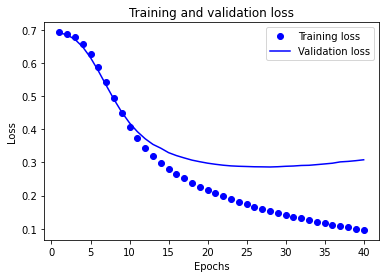

In [24]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

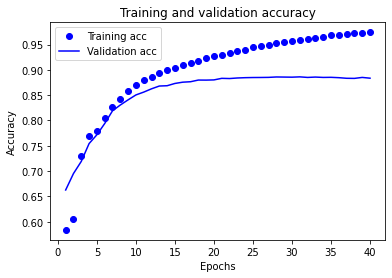

In [25]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

이 그래프에서 점선은 훈련 손실과 훈련 정확도를 나타냅니다. 실선은 검증 손실과 검증 정확도입니다.

훈련 손실은 에포크마다 *감소*하고 훈련 정확도는 *증가*한다는 것을 주목하세요. 경사 하강법 최적화를 사용할 때 볼 수 있는 현상입니다. 매 반복마다 최적화 대상의 값을 최소화합니다.

하지만 검증 손실과 검증 정확도에서는 그렇지 못합니다. 약 20번째 에포크 이후가 최적점인 것 같습니다. 이는 과대적합 때문입니다. 이전에 본 적 없는 데이터보다 훈련 데이터에서 더 잘 동작합니다. 이 지점부터는 모델이 과도하게 최적화되어 테스트 데이터에서 *일반화*되기 어려운 훈련 데이터의 특정 표현을 학습합니다.

여기에서는 과대적합을 막기 위해 단순히 20번째 에포크 근처에서 훈련을 멈출 수 있습니다. 나중에 콜백(callback)을 사용하여 자동으로 이렇게 하는 방법을 배워 보겠습니다.